# Artificial Neural Networks and Deep Learning



---



## Homework 1: Minimal Working Example



To make your first submission, follow these steps:

1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.

2. Upload the `training_set.npz` file to this folder.

3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.

4. Load and process the data.

5. Implement and train your model.

6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [ ]:
%%writefile requirements.txt

tensorflow==2.17.0

keras==3.4.1

In [ ]:
!pip install -r requirements.txt

## ⚙️ Import Libraries

In [5]:
# Set seed for reproducibility

seed = 42



# Import necessary libraries

import os



# Set environment variables before importing modules

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

os.environ['PYTHONHASHSEED'] = str(seed)

os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'



# Suppress warnings

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

warnings.simplefilter(action='ignore', category=Warning)



# Import necessary modules

import logging

import random

import numpy as np



# Set seeds for random number generators in NumPy and Python

np.random.seed(seed)

random.seed(seed)





import tensorflow as tf

#from tensorflow import keras as tfk

import keras as tfk       #notice how I'm importing keras and not tensorflow.keras

from keras.layers import Input, Dense, Dropout, Lambda

#from tensorflow.keras.layers import Input, Dense, Dropout, Lambda

from keras import layers as tfkl





print(f"Tensorflow version -> {tf.__version__}")

print(f"Keras version -> {tfk.__version__}")

# Set seed for TensorFlow

tf.random.set_seed(seed)

tf.compat.v1.set_random_seed(seed)



# Reduce TensorFlow verbosity

tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)



# Print TensorFlow version

print(tf.__version__)



# Import other libraries

import requests

from io import BytesIO

import cv2

from PIL import Image

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import seaborn as sns



# Configure plot display settings

sns.set(font_scale=1.4)

sns.set_style('white')

plt.rc('font', size=14)

%matplotlib inline

Tensorflow version -> 2.16.1
Keras version -> 3.3.3
2.16.1


## ⏳ Load the Data

In [6]:
data = np.load('/kaggle/input/training-set-cleaned/training_set_cleaned.npz')



# Code for exploring npz content

print(data.files)

for key in data.files:

    array = data[key]

    print(f"Array '{key}':")

    print(f"  Shape: {array.shape}")

    print(f"  Data Type: {array.dtype}")



#arrays

X = data['images']

y = data['labels']



# Define a mapping of labels to their corresponding cell type names

labels = {

    0: 'Basophil',

    1: 'Eosinophil',

    2: 'Erythroblast',

    3: 'Immature granulocytes',

    4: 'Lymphocyte',

    5: 'Monocyte',

    6: 'Neutrophil',

    7: 'Platelet'

}

# Save unique labels

unique_labels = list(labels.values())

['images', 'labels']
Array 'images':
  Shape: (11951, 96, 96, 3)
  Data Type: uint8
Array 'labels':
  Shape: (11951, 1)
  Data Type: uint8


## 🔄 Process Data

In [7]:
# Split data into training and validation sets, maintaining class distribution

X_train, X_val, y_train, y_val = train_test_split(

    X,

    y,

    test_size=0.1,

    random_state=seed,

    stratify=y

)

# Print the shapes of the resulting datasets

print("Training Data Shape:", X_train.shape)

print("Training Label Shape:", y_train.shape)

print("Validation Data Shape:", X_val.shape)

print("Validation Label Shape:", y_val.shape)

Training Data Shape: (10755, 96, 96, 3)
Training Label Shape: (10755, 1)
Validation Data Shape: (1196, 96, 96, 3)
Validation Label Shape: (1196, 1)


In [8]:
import numpy as np

from sklearn.utils import class_weight



# Se y_train è one-hot encoded, convertilo in etichette scalari

if y_train.ndim > 1:

    y_train_temp = np.argmax(y_train, axis=-1)  # Copia temporanea per il calcolo

else:

    y_train_temp = y_train  # Se non è one-hot, usa direttamente y_train



# Calcola i pesi delle classi

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_temp), y=y_train_temp)

class_weight_dict = dict(enumerate(class_weights))



print("Class weights:", class_weight_dict)

Class weights: {0: 1.0}


In [9]:


# Convert class labels to categorical format for training, validation, and test sets

y_train = tfk.utils.to_categorical(y_train, num_classes=len(unique_labels))

y_val = tfk.utils.to_categorical(y_val, num_classes=len(unique_labels))



# Print shapes of the datasets

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


X_train shape: (10755, 96, 96, 3), y_train shape: (10755, 8)
X_val shape: (1196, 96, 96, 3), y_val shape: (1196, 8)


## 🧮 Define Network Parameters

In [10]:
# Input shape for the model

input_shape = X_train.shape[1:]



# Output shape for the model

output_shape = y_train.shape[-1]



print("Input Shape:", input_shape)

print("Output Shape:", output_shape)

Input Shape: (96, 96, 3)
Output Shape: 8


In [11]:
# Number of training epochs

epochs = 500



# Batch size for training

batch_size = 64



# Learning rate: step size for updating the model's weights

learning_rate = 0.001





l2_lambda = 1e-2



# Augmentation: set an augmentation layer or not

augmentation = True



# Patience

patience = 15



# Dropout



#Name

name = 'ResNet50_WithLion'



#Display the architecture

display = False



# Print the defined parameters

print("Epochs:", epochs)

print("Batch Size:", batch_size)

print("Learning Rate:", learning_rate)

print("Augmentation:", augmentation)

print("Patience:", patience)





# Example parameters configuration

params = {

    "l2_lambda": l2_lambda,

    "name": name,

    "optimizer": "Adam",

    "loss": "categorical_crossentropy",

    "epochs": epochs,

    "batch_size": batch_size,

    "learning_rate": learning_rate,

    "Augmentation": augmentation,

    "Patience:": patience,

    "activation_output": "softmax",

}


Epochs: 500
Batch Size: 64
Learning Rate: 0.001
Augmentation: True
Patience: 15


In [12]:


import json



def save_model_with_params(model, params, logs, folder_name):



    # Create folder if it doesn't exist

    folder_name = os.path.join('models', folder_name)  # 'models' as the base directory

    os.makedirs(folder_name, exist_ok=True)



    # Save model in .keras format

    model_save_path = os.path.join(folder_name, 'weights.keras')

    model.save(model_save_path)

    print(f"Model saved at: {model_save_path}")



    # Save parameters and metrics in JSON file

    params_save_path = os.path.join(folder_name, 'params.json')

    with open(params_save_path, 'w') as f:

        json.dump(params, f, indent=4)

    print(f"Parameters saved at: {params_save_path}")


## 🛠️ buid the model


In [13]:
# Initialize ResNet50 model with pretrained weights for transfer learning

mobilenet = tfk.applications.ResNet50(

    input_shape=input_shape,

    include_top=False,

    weights='imagenet',

    pooling='avg',

)





# Display a summary of the model architecture

if display:

   mobilenet.summary(expand_nested=True)



# Display the architecture with layer shapes and trainable parameters

if display:

   tfk.utils.plot_model(mobilenet, expand_nested=False, show_trainable=True, show_shapes=False, dpi=70)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
# Initialise weights and regulariser

initialiser = tfk.initializers.GlorotNormal(seed=seed)

regulariser = tfk.regularizers.l2(l2_lambda)





# Freeze all layers in MobileNetV3Small to use it solely as a feature extractor

mobilenet.trainable = False



# Define input layer with shape matching the input images



# inputs = tfk.Input(shape=input_shape, name='input_layer')



inputs = tfk.Input(shape=(None, None, 3), name='input_layer')  # Accept any input size

x_in = tfkl.Resizing(96, 96)(inputs)  # Resize images to 96x96





# Apply data augmentation for training robustness



augmentation = tf.keras.Sequential([



    # Geometric transformations

    tfkl.RandomFlip("horizontal"),                         # Flipping orizzontale casuale

    tfkl.RandomFlip("vertical"),

    tfkl.RandomTranslation(0.2, 0.2),                      # Traslazione casuale fino al 20% dell'altezza e larghezza

    tfkl.RandomRotation(0.5),                              # Rotazione casuale fino a ±0.5 radianti (~28.6 gradi)




    # Color adjustments

    tfkl.RandomBrightness(0.1),                            # Aggiustamento casuale della luminosità ±20%

    tfkl.RandomContrast(0.1),                              # Aggiustamento casuale del contrasto ±20%



    # Noise injection

    tfkl.GaussianNoise(0.1),                               # Aggiunge rumore gaussiano con deviazione standard 0.1



   ], name='preprocessing')



# Applica l'augmentation ai dati di input

x = augmentation(x_in)





# Pass augmented inputs through the MobileNetV3Small feature extractor



if augmentation:

    x = mobilenet(x)

else:

    x = mobilenet(x_in)





# Add a dropout layer for regularisation

x = tfkl.Dropout(0.3, name='dropout')(x)

params['Dropout'] = 0.3



x = tfkl.Dense(128, activation='relu',kernel_initializer=initialiser, name='dense_1')(x)

params['Dense1'] =  128



x = tfkl.Dense(64, activation='relu',kernel_initializer=initialiser, name='dense_2')(x)

params['Dense2'] = 64





# Add final Dense layer for classification with softmax activation

outputs = tfkl.Dense(output_shape, activation='softmax', name='dense')(x)



# Define the complete model linking input and output

tl_model = tfk.Model(inputs=inputs, outputs=outputs, name=name)

In [15]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Lion

from tensorflow.keras import mixed_precision  # Ensure you import this module

#Implementiamo Learning Rate decay



initial_learning_rate = learning_rate

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(

    initial_learning_rate=initial_learning_rate,

    decay_steps=8000,

    decay_rate=0.96,

    staircase=True

)

optimizer = Lion(learning_rate=lr_schedule, weight_decay=1e-2)


# Imposta la policy mixed float16

mixed_precision.set_global_policy('mixed_float16')


# Compile the model with categorical cross-entropy loss and Adam optimiser
#add initializer
tl_model.compile(

    loss=tf.keras.losses.CategoricalCrossentropy(),

    optimizer=optimizer,

    metrics=['accuracy']

)

# Display a summary of the model architecture

if display:

   tl_model.summary(expand_nested=True)



# Display model architecture with layer shapes and trainable parameters

if display:

   tfk.utils.plot_model(tl_model, expand_nested=False, show_trainable=False, show_shapes=True, dpi=70)

## 🧠 Train and save the Model

In [16]:
from tensorflow.keras import mixed_precision

from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.callbacks import Callback



# Define the patience value for early stopping

patience = patience



# Create an EarlyStopping callback

early_stopping = tfk.callbacks.EarlyStopping(

    monitor='val_loss',

    mode='min',

    patience=patience,

    restore_best_weights=True

)








class SaveEveryNEpochs(Callback):

    def __init__(self, save_interval, params, name_prefix):

        super(SaveEveryNEpochs, self).__init__()

        self.save_interval = save_interval

        self.params = params

        self.name_prefix = name_prefix



    def on_epoch_end(self, epoch, logs=None):

        # Salva ogni N epoche

        if (epoch + 1) % self.save_interval == 0:

            # Costruisci il nome della cartella per il salvataggio

            folder_name = f"{self.name_prefix}"



            # Salva il modello e i parametri

            save_model_with_params(self.model, self.params, logs, folder_name)

            print(f"Model and parameters saved at {folder_name}")



# Inizializza il callback per salvare ogni 100 epoche

save_every_100_epochs = SaveEveryNEpochs(

    save_interval=100,

    params=params,

    name_prefix='model_checkpoint'

)



# Store the callback in a list

callbacks = [early_stopping, save_every_100_epochs]

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Train the model

tl_history_obj = tl_model.fit(

    x=X_train,

    y=y_train,

    batch_size= batch_size,

    epochs= epochs,

    validation_data=(X_val, y_val),

    callbacks= callbacks,

    class_weight=class_weight_dict ,

)

tl_history= tl_history_obj.history



# Calculate and print the best validation accuracy achieved

final_val_accuracy = round(max(tl_history_obj.history['val_accuracy']) * 100, 2)

print(f'Final validation accuracy: {final_val_accuracy}%')



# Save the trained model to a file, including final accuracy in the filename

save_model_with_params(tl_model, params, tl_history, name + str(final_val_accuracy))



# Free memory by deleting the model instance

# del tl_model

Epoch 1/500
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.8046 - loss: 0.5431 - val_accuracy: 0.8336 - val_loss: 0.4654
Epoch 2/500
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8266 - loss: 0.4992 - val_accuracy: 0.8370 - val_loss: 0.4928
Epoch 3/500
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.8314 - loss: 0.4858 - val_accuracy: 0.8662 - val_loss: 0.4305
Epoch 4/500
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.8210 - loss: 0.5020 - val_accuracy: 0.8478 - val_loss: 0.4509
Epoch 5/500
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.8361 - loss: 0.4709 - val_accuracy: 0.8520 - val_loss: 0.4289
Epoch 6/500
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.8381 - loss: 0.4585 - val_accuracy: 0.8637 - val_loss: 0.4135
Epoch 7/500
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.8447 - loss: 0.4592 - val_accuracy: 0.8403 - val_loss: 0.5055
Epoch 8/500
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.8370 - loss: 0

In [ ]:
# Create figure and subplots for loss and accuracy

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))



# Plot loss for both re-trained and transfer learning models



ax1.plot(tl_history['loss'], alpha=0.3, color='#4D61E2', linestyle='--')

ax1.plot(tl_history['val_loss'], label='Transfer Learning', alpha=0.8, color='#4D61E2')

ax1.set_title('Categorical Crossentropy')

ax1.legend(loc='upper left')

ax1.grid(alpha=0.3)



# Plot accuracy for both re-trained and transfer learning models



ax2.plot(tl_history['accuracy'], alpha=0.3, color='#4D61E2', linestyle='--')

ax2.plot(tl_history['val_accuracy'], label='Transfer Learning', alpha=0.8, color='#4D61E2')

ax2.set_title('Accuracy')

ax2.grid(alpha=0.3)



# Adjust layout to prevent label overlap and display the plots

plt.tight_layout()

plt.show()

## :) FINE TUNING

In [37]:
ft_model = tfk.models.load_model('/kaggle/working/models/ResNet50_WithLion88.63/weights.keras')


#del tl_model

# Display a summary of the model architecture

#ft_model.summary(expand_nested=True, show_trainable= True)



# Display model architecture with layer shapes and trainable parameters

#tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [38]:
# Set the ResNet50 model layers as trainable

ft_model.get_layer('resnet50').trainable = True


# Set all ResNet50 layers as non-trainable

for layer in ft_model.get_layer('resnet50').layers:

    layer.trainable = False


In [39]:

#Implementiamo Learning Rate decay


initial_learning_rate = learning_rate/20

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(

    initial_learning_rate=initial_learning_rate,

    decay_steps=5000,

    decay_rate=0.96,

    staircase=True

)



In [40]:
import tensorflow as tf


def Unfreeze(count, start_unfreeze=2):
    resnet50_layers = ft_model.get_layer('resnet50').layers
    total_layers = len(resnet50_layers)
    conv_layers_to_unfreeze = min(start_unfreeze+count*5, total_layers)  # Fixed the variable name

    # Freeze all layers first
    for layer in resnet50_layers:
        layer.trainable = False

    # Gradually unfreeze only Conv2D layers
    for i, layer in enumerate(resnet50_layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            if i >= total_layers - conv_layers_to_unfreeze:
                layer.trainable = True  # Unfreeze the Conv2D layers as needed

    print(f"Now training with {conv_layers_to_unfreeze} unfrozen Conv2D layers.")  # Moved print statement inside

    # Recompile only if necessary

    mixed_precision.set_global_policy('mixed_float16')
    optimizer = Lion(learning_rate=0.00001)
    ft_model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                     metrics=['accuracy']
)

early_stopping = tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=8, restore_best_weights=True)

# Store the callback in a list

callbacks = [early_stopping]



In [41]:
# Supponiamo che epochs sia definito precedentemente
interval = 50  # Esempio, puoi cambiare il numero di epoche


for count in range(epochs // interval):
    # Chiamata alla funzione Unfreeze passando count
    Unfreeze(count)
    
    # Addestra il modello per interval epoche
    ft_history_obj = ft_model.fit(
        x=X_train,  # Assicurati che le immagini siano scalate da [0,1] a [0,255] se necessario
        y=y_train,
        batch_size=64,
        epochs=interval,  # Allenamento per 5 epoche
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        class_weight=class_weight_dict
    )

    print(f'cycle {count} of {epochs // interval}. Epoch {count*interval} of {epochs}')
    if early_stopping.stopped_epoch > 0:
        print(f"Early stopping triggered at cycle {count}")
    
    
 
    # Salva la cronologia dell'allenamento
    ft_history = ft_history_obj.history
    save_model_with_params(ft_model, params, ft_history, 'ft_checkpoint_' + name)
    
final_val_accuracy = round(max(ft_history['val_accuracy']) * 100, 2)

print(f'Final validation accuracy: {final_val_accuracy}%')



# Save the trained model to a file, including final accuracy in the filename

save_model_with_params(ft_model, params, ft_history, 'ft' + name)



# Delete the model to free up resources

#del ft_model







Now training with 2 unfrozen Conv2D layers.
Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.8416 - loss: 0.4663 - val_accuracy: 0.8671 - val_loss: 0.3868
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.8507 - loss: 0.4326 - val_accuracy: 0.8645 - val_loss: 0.3891
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.8493 - loss: 0.4352 - val_accuracy: 0.8579 - val_loss: 0.3976
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.8578 - loss: 0.4109 - val_accuracy: 0.8595 - val_loss: 0.3914
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.8552 - loss: 0.4253 - val_accuracy: 0.8629 - val_loss: 0.3867
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.8614 - loss: 0.4048 - val_accuracy: 0.8637 - val_loss: 0.3835
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.8550 - loss: 0.4160 - val_accuracy: 0.8637 - val_loss: 0.3806
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 63

In [42]:
"""import tensorflow as tf

class GradualUnfreezeCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, interval=5, start_unfreeze=2, max_epochs=500):
        super().__init__()
        self.model = model
        self.interval = interval
        self.max_epochs = max_epochs
        self.start_unfreeze = start_unfreeze
        self.resnet50_layers = model.get_layer('resnet50').layers
        self.total_layers = len(self.resnet50_layers)

    def on_epoch_end(self, epoch, logs=None):
        if epoch < self.max_epochs:
            # Determine how many layers to unfreeze based on the current epoch
            if (epoch + 1) % self.interval == 0:
                conv_layers_to_unfreeze = min(self.start_unfreeze + epoch // self.interval, self.total_layers)

                # Freeze all layers first
                for layer in self.resnet50_layers:
                    layer.trainable = False

                # Gradually unfreeze only Conv2D layers
                for i, layer in enumerate(self.resnet50_layers):
                    if isinstance(layer, tf.keras.layers.Conv2D):
                        if i < self.total_layers - conv_layers_to_unfreeze:
                            layer.trainable = False
                        else:
                            layer.trainable = True
                print(f"Now training with {conv_layers_to_unfreeze} unfrozen layers" )
                # Recompile model to apply changes to the trainability of layers
                self.model.compile(optimizer=self.model.optimizer, loss=self.model.loss, metrics=self.model.metrics)

# Example usage
gradual_unfreeze_callback = GradualUnfreezeCallback(model)


save_every_100_epochs = SaveEveryNEpochs(

    save_interval=100,

    params=params,

    name_prefix='model_checkpoint'

)


# Store the callback in a list

callbacks = [early_stopping, save_every_100_epochs, gradual_unfreeze_callback]

"""

'import tensorflow as tf\n\nclass GradualUnfreezeCallback(tf.keras.callbacks.Callback):\n    def __init__(self, model, interval=5, start_unfreeze=2, max_epochs=500):\n        super().__init__()\n        self.model = model\n        self.interval = interval\n        self.max_epochs = max_epochs\n        self.start_unfreeze = start_unfreeze\n        self.resnet50_layers = model.get_layer(\'resnet50\').layers\n        self.total_layers = len(self.resnet50_layers)\n\n    def on_epoch_end(self, epoch, logs=None):\n        if epoch < self.max_epochs:\n            # Determine how many layers to unfreeze based on the current epoch\n            if (epoch + 1) % self.interval == 0:\n                conv_layers_to_unfreeze = min(self.start_unfreeze + epoch // self.interval, self.total_layers)\n\n                # Freeze all layers first\n                for layer in self.resnet50_layers:\n                    layer.trainable = False\n\n                # Gradually unfreeze only Conv2D layers\n      

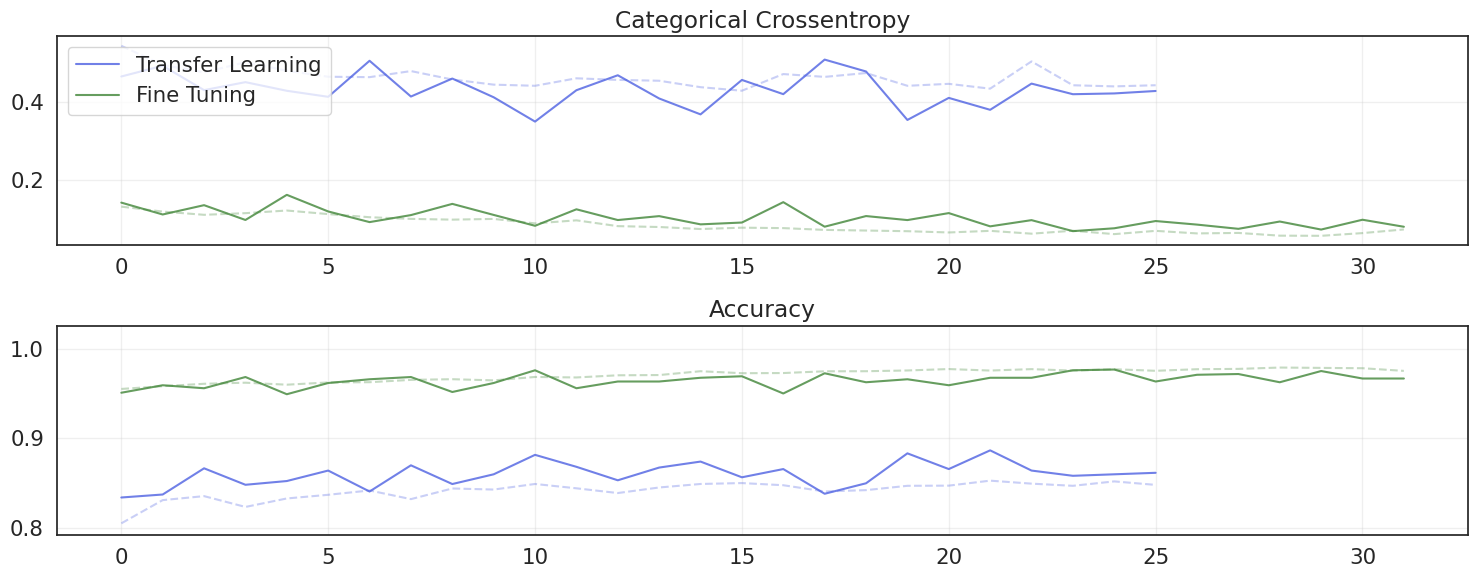

In [43]:
# Create figure and subplots for loss and accuracy

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))



# Plot categorical cross-entropy loss for both Transfer Learning and Fine Tuning stages

ax1.plot(tl_history['loss'], alpha=0.3, color='#4D61E2', linestyle='--')

ax1.plot(tl_history['val_loss'], label='Transfer Learning', alpha=0.8, color='#4D61E2')

ax1.plot(ft_history['loss'], alpha=0.3, color='#408537', linestyle='--')

ax1.plot(ft_history['val_loss'], label='Fine Tuning', alpha=0.8, color='#408537')

ax1.set_title('Categorical Crossentropy')

ax1.legend(loc='upper left')

ax1.grid(alpha=0.3)



# Plot accuracy for both Transfer Learning and Fine Tuning stages

ax2.plot(tl_history['accuracy'], alpha=0.3, color='#4D61E2', linestyle='--')

ax2.plot(tl_history['val_accuracy'], label='Transfer Learning', alpha=0.8, color='#4D61E2')

ax2.plot(ft_history['accuracy'], alpha=0.3, color='#408537', linestyle='--')

ax2.plot(ft_history['val_accuracy'], label='Fine Tuning', alpha=0.8, color='#408537')

ax2.set_title('Accuracy')

ax2.set_ylim([min(tl_history['val_accuracy']) * 0.95, max(ft_history['val_accuracy']) * 1.05])

ax2.grid(alpha=0.3)



# Adjust layout to prevent overlap and display the plots

plt.tight_layout()

plt.show()

Model: "ResNet50_WithLion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, None, None, 3) │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ resizing (Resizing)         │ (None, 96, 96, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ preprocessing (Sequential)  │ (None, 96, 96, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ random_flip            │ (None, 96, 96, 3)     │          0 │   -   │
│ (RandomFlip)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ random_flip_1          │ (None, 96, 96, 3)     │          0 │   -   │
│ (RandomFlip)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ random_translation     │ (None, 96, 96, 3)     │          0 │   -   │
│ (RandomTranslation)         │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ random_rotation        │ (None, 96, 96, 3)     │          0 │   -   │
│ (RandomRotation)            │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ random_brightness      │ (None, 96, 96, 3)     │          0 │   -   │
│ (RandomBrightness)          │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ random_contrast        │ (None, 96, 96, 3)     │          0 │   -   │
│ (RandomContrast)            │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ gaussian_noise         │ (None, 96, 96, 3)     │          0 │   -   │
│ (GaussianNoise)             │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ resnet50 (Functional)       │ (None, 2048)          │ 23,587,712 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ input_layer            │ (None, 96, 96, 3)     │          0 │   -   │
│ (InputLayer)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ conv1_pad              │ (None, 102, 102, 3)   │          0 │   -   │
│ (ZeroPadding2D)             │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ conv1_conv (Conv2D)    │ (None, 48, 48, 64)    │      9,472 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ conv1_bn               │ (None, 48, 48, 64)    │        256 │   N   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ conv1_relu             │ (None, 48, 48, 64)    │          0 │   -   │
│ (Activation)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ pool1_pad              │ (None, 50, 50, 64)    │          0 │   -   │
│ (ZeroPadding2D)             │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ pool1_pool             │ (None, 24, 24, 64)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼─────

 Total params: 40,462,102 (154.35 MB)

 Trainable params: 16,603,336 (63.34 MB)

 Non-trainable params: 7,255,424 (27.68 MB)

 Optimizer params: 16,603,342 (63.34 MB)

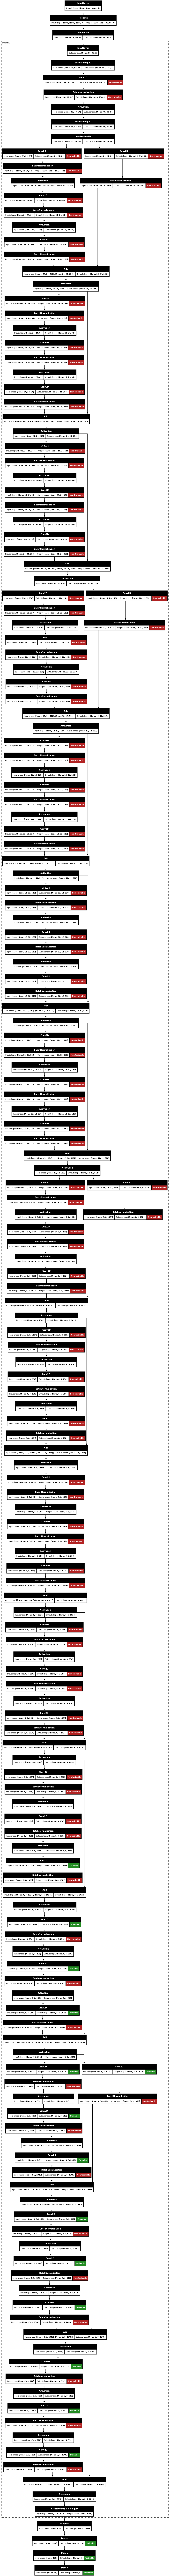

In [44]:
# Load the saved model
model = ft_model
del ft_model
# Display a summary of the model architecture
model.summary(expand_nested=True, show_trainable=True)

# Plot the model architecture
tfk.utils.plot_model(model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Accuracy score over the train set: 0.9829
Precision score over the train set: 0.9829
Recall score over the train set: 0.9829
F1 score over the train set: 0.9829


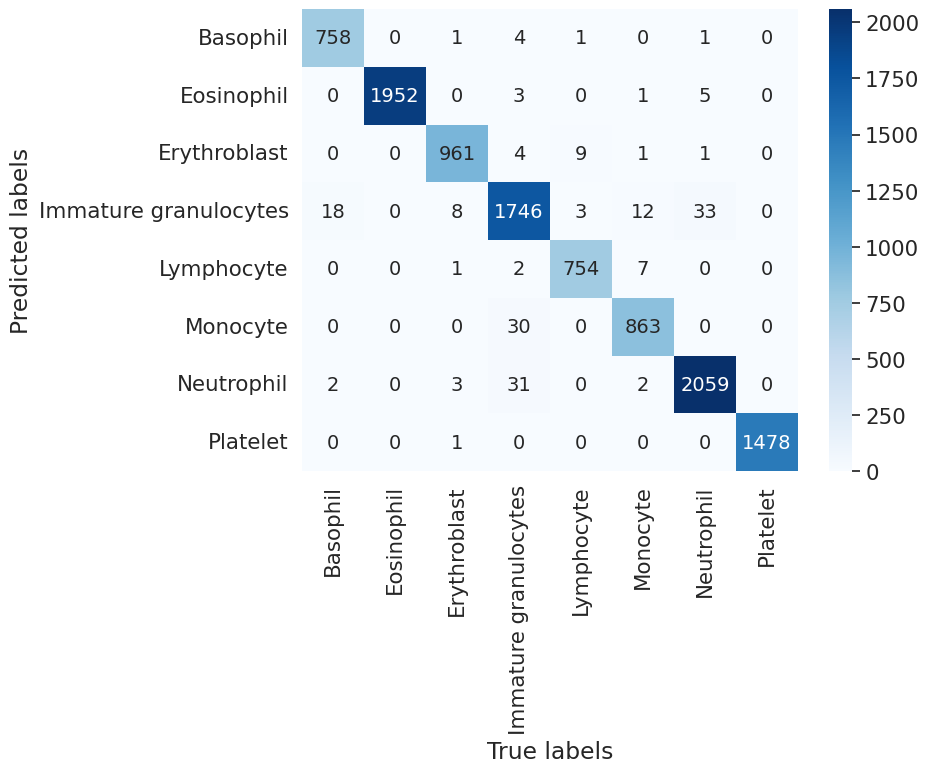

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
# Predict class probabilities and get predicted classes
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions, axis=-1)

# Extract ground truth classes
train_gt = np.argmax(y_train, axis=-1)

# Calculate and display training set accuracy
train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy, 4)}')

# Calculate and display training set precision
train_precision = precision_score(train_gt, train_predictions, average='weighted')
print(f'Precision score over the train set: {round(train_precision, 4)}')

# Calculate and display training set recall
train_recall = recall_score(train_gt, train_predictions, average='weighted')
print(f'Recall score over the train set: {round(train_recall, 4)}')

# Calculate and display training set F1 score
train_f1 = f1_score(train_gt, train_predictions, average='weighted')
print(f'F1 score over the train set: {round(train_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(train_gt, train_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels= unique_labels, yticklabels= unique_labels, cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

Accuracy score over the validation set: 0.9758
Precision score over the validation set: 0.9759
Recall score over the validation set: 0.9758
F1 score over the validation set: 0.9758


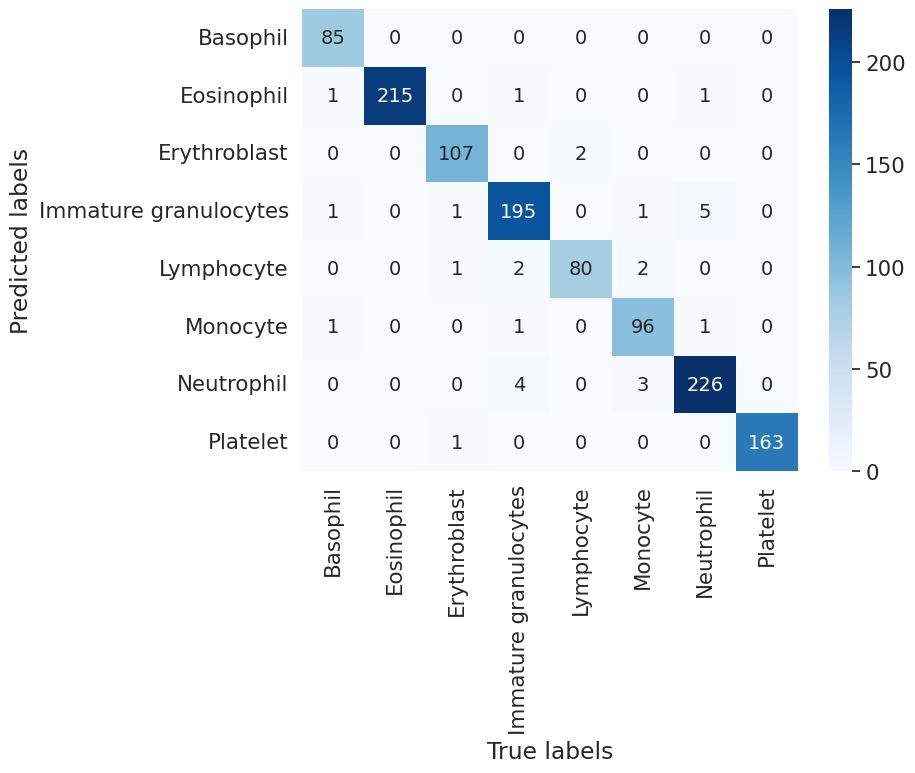

In [46]:
# Predict class probabilities and get predicted classes
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

# Extract ground truth classes
val_gt = np.argmax(y_val, axis=-1)

# Calculate and display validation set accuracy
val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

# Calculate and display validation set precision
val_precision = precision_score(val_gt, val_predictions, average='weighted')
print(f'Precision score over the validation set: {round(val_precision, 4)}')

# Calculate and display validation set recall
val_recall = recall_score(val_gt, val_predictions, average='weighted')
print(f'Recall score over the validation set: {round(val_recall, 4)}')

# Calculate and display validation set F1 score
val_f1 = f1_score(val_gt, val_predictions, average='weighted')
print(f'F1 score over the validation set: {round(val_f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(val_gt, val_predictions)

# Create labels combining confusion matrix values
labels = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=labels, fmt='', xticklabels=unique_labels, yticklabels=unique_labels, cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()